# Alinhamento de imagens

Retirado de: <http://krasserm.github.io/2018/02/07/deep-face-recognition/>

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
from align import AlignDlib

In [4]:
%matplotlib inline

In [5]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

Incializa o utilitário do OpenFace para alinhamento de faces

In [8]:
alignment = AlignDlib('models/landmarks.dat')

Carrega a imagem do Jaques Chirac

In [10]:
jc_orig = load_image("images/Jacques_Chirac_0009.jpg")

Detecta a face e retorna o *Bounding Box*

In [11]:
bb = alignment.getLargestFaceBoundingBox(jc_orig)

Transforma a imagem usando os índices das bordas das faces e corta a imagem em 96x96

In [12]:
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

Mostra a imagem original

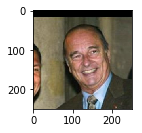

In [13]:
plt.subplot(131)
plt.imshow(jc_orig)

Imagem original com a *Bounding Box*

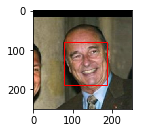

In [14]:
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

Imagem cortada e alinhada

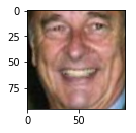

In [15]:
plt.subplot(133)
plt.imshow(jc_aligned)